<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.243250,58.249291,32.827366,64.861293,0.003297,196.184497,196.181629,0.002868
1,0.0,1.0,54.714233,45.299975,62.809630,57.522738,-0.002133,230.344442,230.346879,-0.002437
2,0.0,2.0,55.042821,74.070405,75.235424,91.979596,0.003404,306.331651,306.327369,0.004281
3,0.0,3.0,45.574064,69.044858,88.315394,50.841209,-0.004497,263.771029,263.776318,-0.005289
4,0.0,4.0,40.647601,93.267619,53.213807,63.113079,-0.000937,260.241169,260.242337,-0.001169
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.505072,95.895363,93.437295,49.629014,0.003752,288.470495,288.465518,0.004977
29996,999.0,26.0,60.945953,85.838737,43.195882,50.972707,-0.002132,250.951148,250.952440,-0.001292
29997,999.0,27.0,83.742910,46.652753,27.471979,30.993397,0.004508,198.865547,198.863646,0.001901
29998,999.0,28.0,59.770743,68.250215,75.961114,49.457087,-0.003673,263.435486,263.440048,-0.004562


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.243250,58.249291,32.827366,64.861293,0.003297,196.184497,196.181629,0.002868
1,0.0,1.0,54.714233,45.299975,62.809630,57.522738,-0.002133,230.344442,230.346879,-0.002437
2,0.0,2.0,55.042821,74.070405,75.235424,91.979596,0.003404,306.331651,306.327369,0.004281
3,0.0,3.0,45.574064,69.044858,88.315394,50.841209,-0.004497,263.771029,263.776318,-0.005289
4,0.0,4.0,40.647601,93.267619,53.213807,63.113079,-0.000937,260.241169,260.242337,-0.001169
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.505072,95.895363,93.437295,49.629014,0.003752,288.470495,288.465518,0.004977
29996,999.0,26.0,60.945953,85.838737,43.195882,50.972707,-0.002132,250.951148,250.952440,-0.001292
29997,999.0,27.0,83.742910,46.652753,27.471979,30.993397,0.004508,198.865547,198.863646,0.001901
29998,999.0,28.0,59.770743,68.250215,75.961114,49.457087,-0.003673,263.435486,263.440048,-0.004562


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.243250  58.249291  32.827366  64.861293  0.003297  196.184497   
      1.0    54.714233  45.299975  62.809630  57.522738 -0.002133  230.344442   
      2.0    55.042821  74.070405  75.235424  91.979596  0.003404  306.331651   
      3.0    45.574064  69.044858  88.315394  50.841209 -0.004497  263.771029   
      4.0    40.647601  93.267619  53.213807  63.113079 -0.000937  260.241169   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   39.505072  95.895363  93.437295  49.629014  0.003752  288.470495   
      26.0   60.945953  85.838737  43.195882  50.972707 -0.002132  250.951148   
      27.0   83.742910  46.652753  27.471979  30.993397  0.004508  198.865547   
      28.0   59.770743  68.250215  75.961114  49.457087 -0.003673  263.435486   
      29.0   76.622734  79.322018  86.039329  97.050143  0.002662  349.036885   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    196.181629  0.002868  
      1.0    230.346879 -0.002437  
      2.0    306.327369  0.004281  
      3.0    263.776318 -0.005289  
      4.0    260.242337 -0.001169  
...                 ...       ...  
999.0 25.0   288.465518  0.004977  
      26.0   250.952440 -0.001292  
      27.0   198.863646  0.001901  
      28.0   263.440048 -0.004562  
      29.0   349.032993  0.003892  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.243250  58.249291  32.827366  64.861293  0.003297  196.184497   
      1.0    54.714233  45.299975  62.809630  57.522738 -0.002133  230.344442   
      2.0    55.042821  74.070405  75.235424  91.979596  0.003404  306.331651   
      3.0    45.574064  69.044858  88.315394  50.841209 -0.004497  263.771029   
      4.0    40.647601  93.267619  53.213807  63.113079 -0.000937  260.241169   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   39.505072  95.895363  93.437295  49.629014  0.003752  288.470495   
      26.0   60.945953  85.838737  43.195882  50.972707 -0.002132  250.951148   
      27.0   83.742910  46.652753  27.471979  30.993397  0.004508  198.865547   
      28.0   59.770743  68.250215  75.961114  49.457087 -0.003673  263.435486   
      29.0   76.622734  79.322018  86.039329  97.050143  0.002662  349.036885   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    196.181629  0.002868  
      1.0    230.346879 -0.002437  
      2.0    306.327369  0.004281  
      3.0    263.776318 -0.005289  
      4.0    260.242337 -0.001169  
...                 ...       ...  
999.0 25.0   288.465518  0.004977  
      26.0   250.952440 -0.001292  
      27.0   198.863646  0.001901  
      28.0   263.440048 -0.004562  
      29.0   349.032993  0.003892  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.243250,58.249291,32.827366,64.861293,0.003297,196.184497,196.181629,0.002868
1,0.0,1.0,54.714233,45.299975,62.809630,57.522738,-0.002133,230.344442,230.346879,-0.002437
2,0.0,2.0,55.042821,74.070405,75.235424,91.979596,0.003404,306.331651,306.327369,0.004281
3,0.0,3.0,45.574064,69.044858,88.315394,50.841209,-0.004497,263.771029,263.776318,-0.005289
4,0.0,4.0,40.647601,93.267619,53.213807,63.113079,-0.000937,260.241169,260.242337,-0.001169
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.505072,95.895363,93.437295,49.629014,0.003752,288.470495,288.465518,0.004977
29996,999.0,26.0,60.945953,85.838737,43.195882,50.972707,-0.002132,250.951148,250.952440,-0.001292
29997,999.0,27.0,83.742910,46.652753,27.471979,30.993397,0.004508,198.865547,198.863646,0.001901
29998,999.0,28.0,59.770743,68.250215,75.961114,49.457087,-0.003673,263.435486,263.440048,-0.004562


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.243250  58.249291  32.827366  64.861293  0.003297  196.184497   
      1.0    54.714233  45.299975  62.809630  57.522738 -0.002133  230.344442   
      2.0    55.042821  74.070405  75.235424  91.979596  0.003404  306.331651   
      3.0    45.574064  69.044858  88.315394  50.841209 -0.004497  263.771029   
      4.0    40.647601  93.267619  53.213807  63.113079 -0.000937  260.241169   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   39.505072  95.895363  93.437295  49.629014  0.003752  288.470495   
      26.0   60.945953  85.838737  43.195882  50.972707 -0.002132  250.951148   
      27.0   83.742910  46.652753  27.471979  30.993397  0.004508  198.865547   
      28.0   59.770743  68.250215  75.961114  49.457087 -0.003673  263.435486   
      29.0   76.622734  79.322018  86.039329  97.050143  0.002662  349.036885   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    196.181629  0.002868  
      1.0    230.346879 -0.002437  
      2.0    306.327369  0.004281  
      3.0    263.776318 -0.005289  
      4.0    260.242337 -0.001169  
...                 ...       ...  
999.0 25.0   288.465518  0.004977  
      26.0   250.952440 -0.001292  
      27.0   198.863646  0.001901  
      28.0   263.440048 -0.004562  
      29.0   349.032993  0.003892  

[30000 rows x 8 columns]

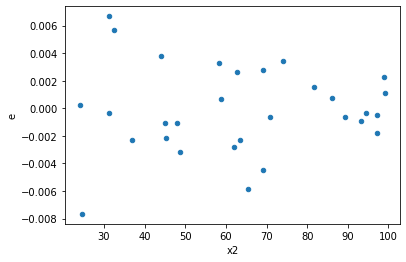

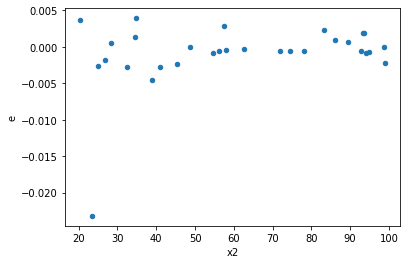

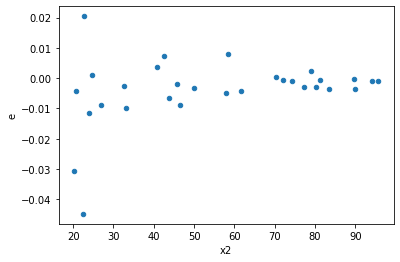

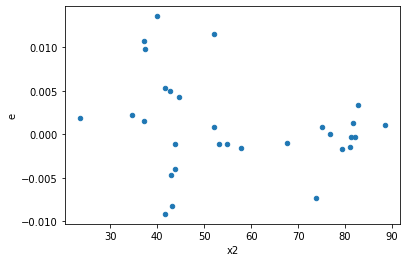

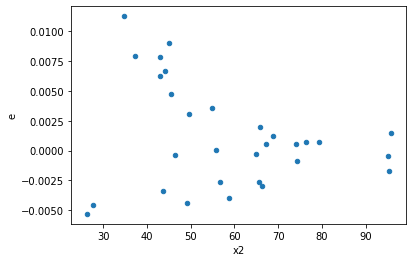

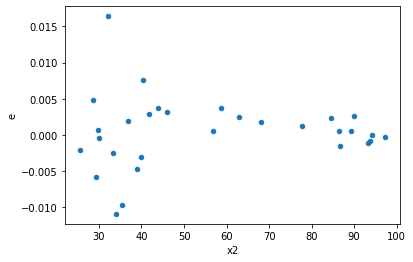

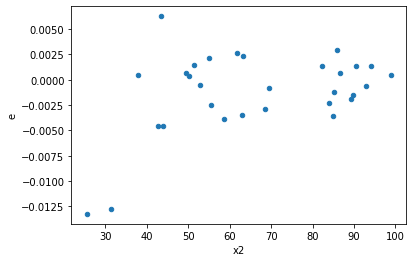

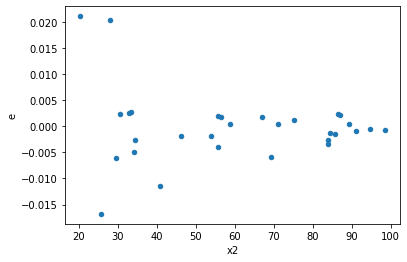

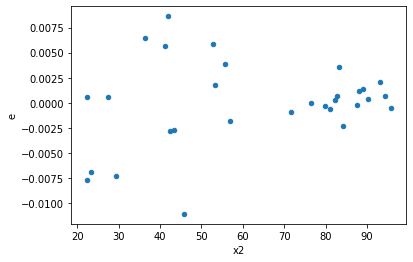

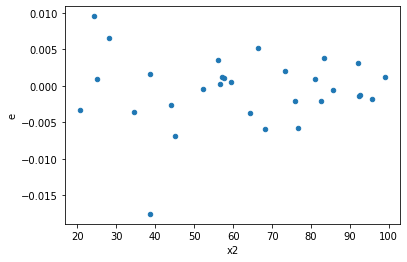

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,8.0,8.0,0.00011755620757262796,0.00024193852886328647,1.4694525946578495e-05,3.024231610791081e-05,2.058066807861365,0.3274239414798299,0.836288029260085,0.16371197073991495,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,0.00017733798868921666,0.00026510700399141424,2.2167248586152083e-05,3.313837549892678e-05,1.4949250634392388,0.5827365743430626,0.7086317128284687,0.2913682871715313,Reject001=1 : Homoscedasticity
21.0,8.0,8.0,0.00010467686721465574,0.0002105336171338724,1.3084608401831968e-05,2.631670214173405e-05,2.011271666185246,0.3427704132398133,0.8286147933800934,0.17138520661990664,Reject001=1 : Homoscedasticity
22.0,8.0,8.0,0.00018118992842239553,0.0002570460959744684,2.264874105279944e-05,3.213076199680855e-05,1.4186555412463913,0.6324984719293592,0.6837507640353204,0.3162492359646796,Reject001=1 : Homoscedasticity
24.0,8.0,8.0,0.00016274592893927183,0.00023107523493639303,2.034324111740898e-05,2.888440436704913e-05,1.4198526282191555,0.6316818663097938,0.6841590668451031,0.3158409331548969,Reject001=1 : Homoscedasticity
30.0,8.0,8.0,9.182381411845336e-05,0.00010004541801094665,1.147797676480667e-05,1.2505677251368332e-05,1.0895367282597015,0.9064374605498065,0.5467812697250968,0.4532187302749032,Reject001=1 : Homoscedasticity
42.0,8.0,8.0,9.613372991659746e-05,0.00011582847656398957,1.2016716239574682e-05,1.4478559570498696e-05,1.2048682253822736,0.7984912800567938,0.6007543599716031,0.3992456400283969,Reject001=1 : Homoscedasticity
43.0,8.0,8.0,7.141590827151077e-05,9.272196053035729e-05,8.926988533938846e-06,1.1590245066294661e-05,1.2983376221701843,0.7207860069975922,0.6396069965012039,0.3603930034987961,Reject001=1 : Homoscedasticity
51.0,8.0,8.0,2.2555330714750412e-05,3.977689891270788e-05,2.8194163393438015e-06,4.972112364088485e-06,1.7635254129390865,0.439682920241107,0.7801585398794465,0.2198414601205535,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,8.384612565465553e-05,7.217981167475374e-05,1.0480765706831941e-05,9.022476459344217e-06,0.8608604286863191,0.8373484386465248,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,5.61525649531702e-05,6.819236153828796e-06,7.019070619146275e-06,8.524045192285995e-07,0.1214412228455791,0.007343192854595774,Reject001=0 : Heteroscedasticity
2.0,8.0,8.0,0.0011143832029266237,5.014307679064999e-05,0.00013929790036582796,6.2678845988312485e-06,0.04499626040572297,0.0002166418572745124,Reject001=0 : Heteroscedasticity
3.0,8.0,8.0,0.0003974102370191191,9.196197372049197e-05,4.967627962738989e-05,1.1495246715061496e-05,0.23140313246653418,0.05375703493797974,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,9.791644671357718e-05,8.910230361824723e-05,1.2239555839197148e-05,1.1137787952280904e-05,0.9099830172441523,0.8971324105510371,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,0.00012242783364682294,0.00010883938110301727,1.5303479205852868e-05,1.360492263787716e-05,0.8890084702225041,0.871912960708046,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,7.660309608348009e-05,4.271008769706294e-05,9.575387010435011e-06,5.338760962132867e-06,0.5575504108935568,0.42636434725571065,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,0.00011755620757262796,0.00024193852886328647,1.4694525946578495e-05,3.024231610791081e-05,2.058066807861365,0.3274239414798299,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,0.00017733798868921666,0.00026510700399141424,2.2167248586152083e-05,3.313837549892678e-05,1.4949250634392388,0.5827365743430626,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      733
Reject001=0 : Heteroscedasticity    267
Name: Result_test, dtype: int64